In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import numpy
import scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

ARIMA(1,1,1)(1,1,1) 4
$
(1 - \phi_{1}B)~(1 - \Phi_{1}B^{4}) (1 - B) (1 - B^{4})y_{t} =
  (1 + \theta_{1}B)~ (1 + \Theta_{1}B^{4})\varepsilon_{t}.
$


ARIMA(4, 0, 2)x(0, 1, 0, 420)

$
(1 - B^{420})(1 - \phi_{1}B - \phi_{2}B^2 - \phi_{3}B^3 - \phi_{4}B^4)Y_t = (1 + \theta_{1}B + \theta_{2}B^2)e_t \\
(1 - \phi_{1}B - \phi_{2}B^2 - \phi_{3}B^3 - \phi_{4}B^4- B^{420}+\phi_{1}B^{421}+\phi_{2}B^{422}+\phi_{3}B^{423}+\phi_{4}B^{424})Y_t= e_t + \theta_{1}B e_t + \theta_{2}B^2e_t \\
Y_t - \phi_{1}BY_t - \phi_{2}B^2Y_t - \phi_{3}B^3Y_t - \phi_{4}B^4Y_t- B^{420} Y_t+\phi_{1}B^{421}Y_t+\phi_{2}B^{422}Y_t+\phi_{3}B^{423}Y_t+\phi_{4}B^{424}Y_t = e_t + \theta_{1}B e_t + \theta_{2}B^2e_t\\
Y_t  = e_t + \theta_{1}B e_t + \theta_{2}B^2e_t + \phi_{1}BY_t + \phi_{2}B^2Y_t + \phi_{3}B^3Y_t + \phi_{4}B^4Y_t+B^{420} Y_t-\phi_{1}B^{421}Y_t-\phi_{2}B^{422}Y_t-\phi_{3}B^{423}Y_t-\phi_{4}B^{424}Y_t \\
\text{For the second step, we replace  t with T+L } \\
\hat{Y}_{T+1|T}  =  \theta_{1}e_T + \theta_{2}e_{T-1} + \phi_{1}Y_T + \phi_{2}Y_{T-1} + \phi_{3}Y_{T-2} + \phi_{4}Y_{T-3}+ Y_{T-419}-\phi_{1}Y_{T-420}-\phi_{2}Y_{T-421}-\phi_{3}Y_{T-422}-\phi_{4}Y_{T-423} \\
\hat{Y}_{T+2|T}  =  \theta_{2}e_{T} + \phi_{1}Y_{T+1|T} + \phi_{2}Y_{T} + \phi_{3}Y_{T-1} + \phi_{4}Y_{T-2}+ Y_{T-418}-\phi_{1}Y_{t-419}-\phi_{2}Y_{T-420}-\phi_{3}Y_{T-421}-\phi_{4}Y_{T-422} \\
\hat{Y}_{T+3|T}  =  \phi_{1}Y_{T+2|T} + \phi_{2}Y_{T+1|T} + \phi_{3}Y_{T} + \phi_{4}Y_{T-1}+ Y_{T-417}-\phi_{1}Y_{T-418}-\phi_{2}Y_{T-419}-\phi_{3}Y_{T-420}-\phi_{4}Y_{T-421}\\
\text{for L>=5 } \\
\hat{Y}_{T+L|T}  =  \phi_{1}Y_{T+L-1|T} + \phi_{2}Y_{T+L-2|T} + \phi_{3}Y_{T+L-3|T} + \phi_{4}Y_{T+L-4|T}+ Y_{T+L-420}-\phi_{1}Y_{T+L-420+1}-\phi_{2}Y_{T+L-420+2}-\phi_{3}Y_{T+L-420+3}-\phi_{4}Y_{T+L-420+4}
$

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# import sys
#
# print(sys.path)
# sys.path += ['/content/drive/Othercomputers/我的笔记本电脑/Research']
# sys.path += ['/content/drive/MyDrive/informer/Informer2020']
# sys.path += ['/content/drive/MyDrive/informer/ETDataset']
# sys.path += ['/content/drive/Othercomputers/我的笔记本电脑/Research/file_resource']
# if not 'Informer2020' in sys.path:
#     sys.path += ['Informer2020']

In [3]:
# from file_resource.mmash_master.function_code import open_data, circadian, HRV_analysis
#
# path = '/content/drive/Othercomputers/我的笔记本电脑/Research/file_resource/multilevel-monitoring-of-activity-and-sleep-in-healthy-people-1.0.0/DataPaper/' # Select the path where the data are allocated
# users = os.listdir(path)[:-1] # Cerate a list of users' name
# print(users)

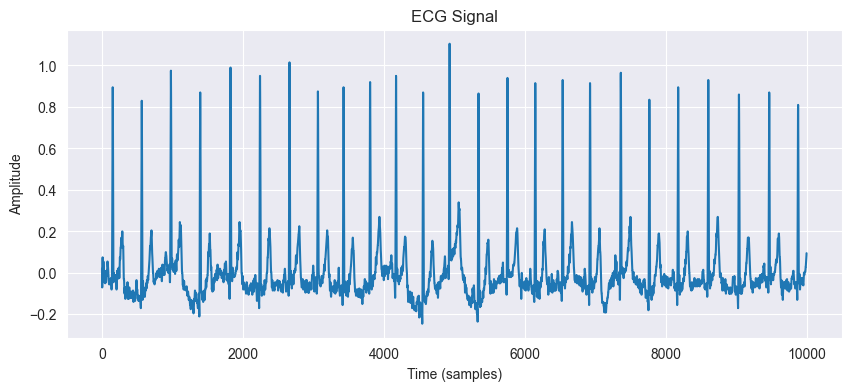

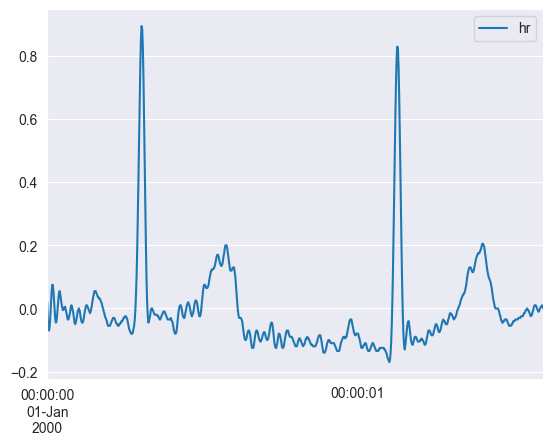

<Figure size 1000x400 with 0 Axes>

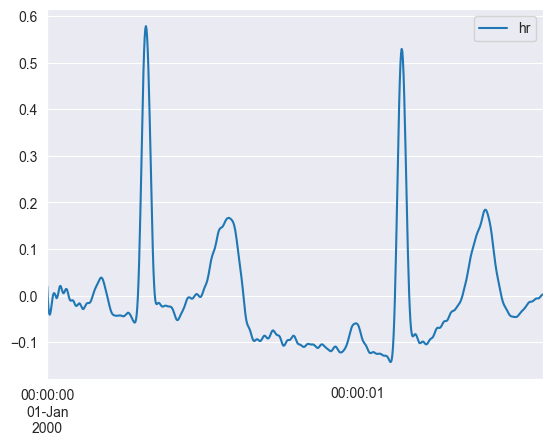

In [1]:
import statsmodels.api as sm
import itertools
import pandas as pd
import warnings
import matplotlib.pyplot as plt
# hr2 = pd.read_csv("file_resource/ecg-id-database-1.0.0/Person_03",names=["hr"])
# print(hr2.head())
# create new datatime index to hr2, every 0.5s

import wfdb
import matplotlib.pyplot as plt

# Specify the path to your downloaded data
path_to_data = 'file_resource/ecg-id-database-1.0.0/Person_03/'

# The record name is the filename without the extension
record_name = 'rec_1'

# Use the 'rdrecord' function to read the ECG data
record = wfdb.rdrecord(f'{path_to_data}/{record_name}')
# Plot the ECG data
plt.figure(figsize=(10, 4))
plt.plot(record.p_signal[:,1])
plt.title('ECG Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()
hr2 = pd.DataFrame(record.p_signal[:,1],columns=["hr"])
hr2.to_csv("heart_rate.csv")

datetime_series = pd.Series(
    pd.date_range("2000-01-01", periods=10000, freq="2ms")
)
#
hr2.set_index(datetime_series,inplace=True)
import pickle
hr2_train = hr2[:8000]
hr2_test = hr2[8000:]
pickle.dump(hr2_train,open("hr2_train.pkl","wb"))
pickle.dump(hr2_test,open("hr2_test.pkl","wb"))

hr2[0:800].plot()
plt.figure(figsize=(10, 4))
hr2[0:800].rolling(15,min_periods=1).mean().plot()

from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)

2000-01-01 00:00:00.000   -0.058978
2000-01-01 00:00:00.002   -0.057740
2000-01-01 00:00:00.004   -0.058993
2000-01-01 00:00:00.006   -0.060240
2000-01-01 00:00:00.008   -0.060234
                             ...   
2000-01-01 00:00:03.990   -0.043179
2000-01-01 00:00:03.992   -0.051925
2000-01-01 00:00:03.994   -0.060670
2000-01-01 00:00:03.996   -0.066920
2000-01-01 00:00:03.998   -0.070678
Name: seasonal, Length: 2000, dtype: float64


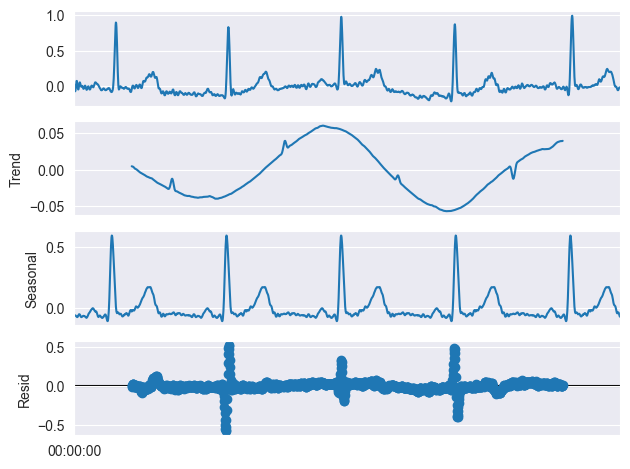

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(hr2_train[:2000], period = 420)
result.plot()
# result.resid.to_csv("resid.csv")
print(result.seasonal)

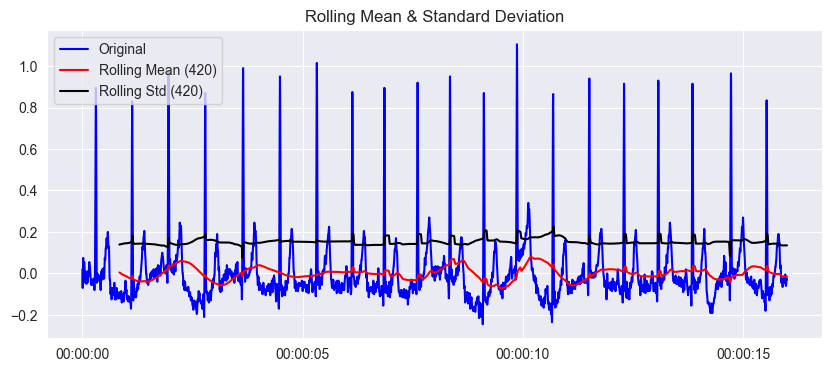

Results of Dickey-Fuller Test:
adf: -10.853589932368232
pvalue: 1.5071371640907064e-19
usedlag: 36
nobs: 7963
critical_values: {'1%': -3.4311714754806224, '5%': -2.861903033070527, '10%': -2.5669632378194773}
icbest: -65916.09318901645
Test Statistic                -1.085359e+01
p-value                        1.507137e-19
#Lags Used                     3.600000e+01
Number of Observations Used    7.963000e+03
Critical Value (1%)           -3.431171e+00
Critical Value (5%)           -2.861903e+00
Critical Value (10%)          -2.566963e+00
dtype: float64


In [6]:
# check the data is stationary or not
# estimate the d

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(420).mean()
    rolstd = timeseries.rolling(420).std()

    #Plot rolling statistics:
    plt.figure(figsize=(10, 4))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean (420)')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std (420)')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    # dftest = adfuller(timeseries, autolag='AIC')
    dftest = adfuller(timeseries, autolag='AIC')
    adf, pvalue, usedlag, nobs, critical_values, icbest = dftest
    print('adf:', adf)
    print('pvalue:', pvalue)
    print('usedlag:', usedlag)
    print('nobs:', nobs)
    print('critical_values:', critical_values)
    print('icbest:', icbest)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(hr2_train)

P value is 1.50e-19, the p-value is very less than the significance level of 0.05 and hence we can reject the null hypothesis and take that the series is stationary. So d = 0

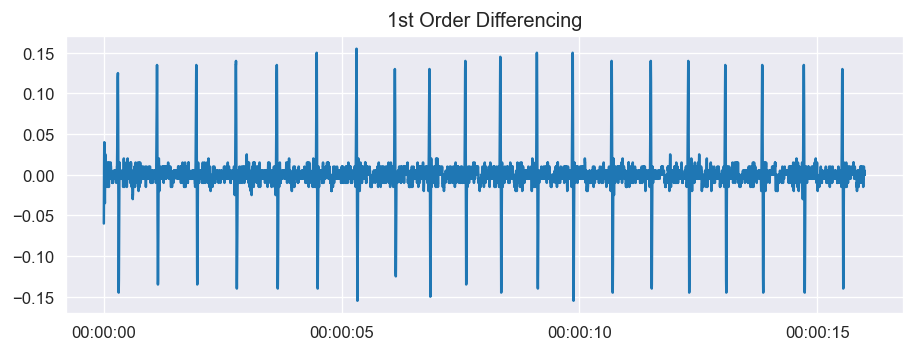

<Figure size 2400x1200 with 0 Axes>

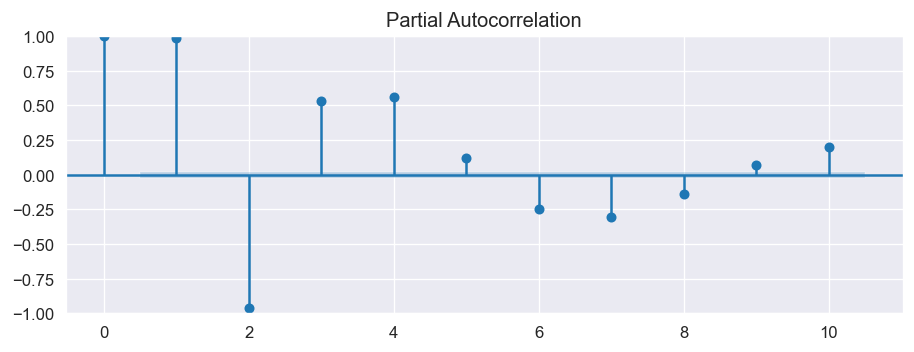

<Figure size 2400x1200 with 0 Axes>

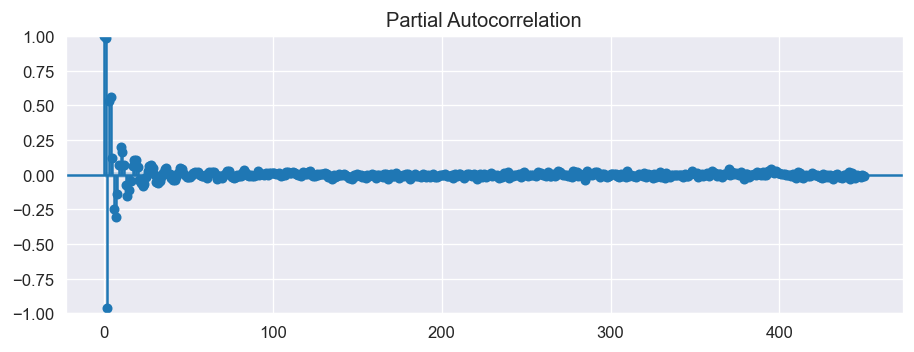

In [7]:
from statsmodels.tsa.stattools import pacf
import numpy as np
# estimate the p
# # PACF plot of 1st differenced series
from statsmodels.tsa.stattools import acovf,acf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# print(hr2_train.diff())
plt.plot(hr2_train.diff())
plt.title('1st Order Differencing')
plt.show()

# res = pacf(hr2_train,nlags=500,alpha=0.05,method='ols')
# print(res)




# plt.scatter(range(len(res[0])),res[0],s=10)
plt.show()
# print(res)
plt.figure(figsize=(20, 10))
plot_pacf(hr2_train,method='ols',lags=10,alpha=0.05)
plt.show()

plt.show()
# print(res)
plt.figure(figsize=(20, 10))
plot_pacf(hr2_train,method='ols',lags=450,alpha=0.05)
plt.show()

# second order differencing
# plt.plot(hr2_train.diff().diff())
# plt.title('2nd Order Differencing')
# plot_pacf(hr2_train.diff().diff().dropna(),method='ywm')
# plt.show()

You can observe that the PACF lag 1 is quite significant since is well above the significance line. Lag 2 turns out to be significant as well, slightly managing to cross the significance limit (blue region). But I am going to be conservative and tentatively fix the p as 1 or 2.

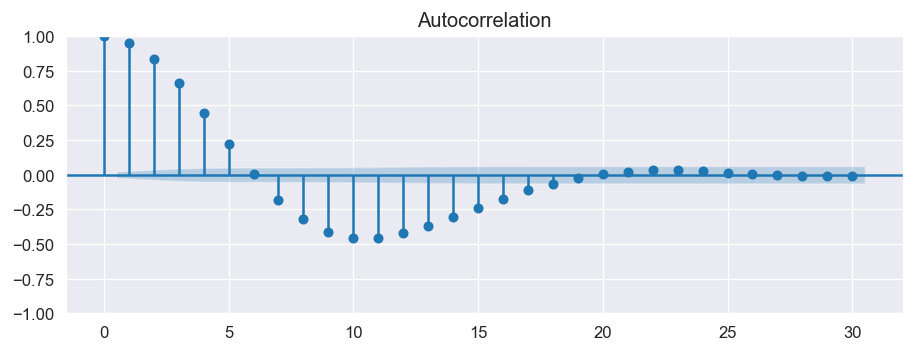

In [8]:
# estimate the q
# plot_acf(hr2_train.diff().dropna(),lags=835)
# plt.show()

plot_acf(hr2_train.diff().dropna(),lags=30)
plt.show()

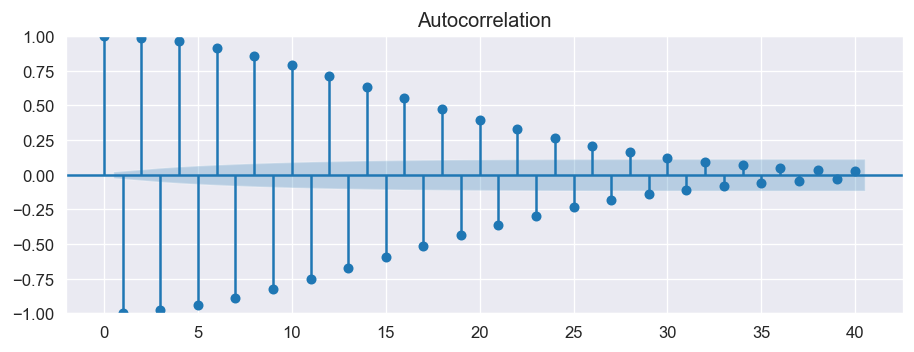

In [9]:
from statsmodels.tsa.statespace.tools import diff
# plot the diff

# plot_acf(diff(hr2_train,k_diff=420),lags=500)
# plt.show()


plot_acf(diff(hr2_train,k_diff=420),lags=40)
plt.show()


Couple of lags are well above the significance line. So, let’s tentatively fix q as 19.

In [10]:

# mod = sm.tsa.statespace.SARIMAX(hr2_train[0:1000],
#                                             order=(4,0,2),
#                                             seasonal_order=(0, 1, 0, 420),
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)
#
# results = mod.fit(method='lbfgs',maxiter=25)
# results.plot_diagnostics(figsize=(15, 12))
# print("aic: "+ str(results.aic))
# print("mse: " + str(results.mse))
# plt.show()

In [11]:

mod = sm.tsa.arima.ARIMA(hr2_train[0:1000],
                                            order=(2,0,0),
                                            seasonal_order=(0, 1, 0, 420),
                                            enforce_stationarity=True,
                                            enforce_invertibility=True)

results = mod.fit()
results.plot_diagnostics(figsize=(15, 12))
print("aic: "+ str(results.aic))
print("mse: " + str(results.mse))

plt.show()

MemoryError: Unable to allocate 2.65 GiB for an array with shape (2000, 422, 422) and data type float64

In [ ]:
# res_summary = results.summary()
# print(res_summary)
# with open('sarimax.txt', 'w') as fh:
#     fh.write(res_summary.as_text())
results.fittedvalues.to_csv('sarimax_fitted.csv')
print(results.fittedvalues)
print(results.arparams)
print(results.maparams)
res_resid = results.resid
# res_resid.plot()
res_resid.to_csv('sarimax_resid.csv')

In [12]:
# print(results.summary())

NameError: name 'results' is not defined

In [ ]:
print(results.summary().as_text())
print(results.params)
pred = results.forecast(steps=10,signal_only=True)
print(pred)

order=(1,0,5),seasonal_order=(0, 1, 0, 420), aic = -3576.162082261916 mse = 0.008245963194632578 The Mean Squared Error of our forecasts is 0.01432118
order=(1,0,19),seasonal_order=(0, 1, 0, 420), aic = -4051.3481007715645 mse = 0.008194732834186947 The Mean Squared Error of our forecasts is 0.01467641
order=(2,0,1),seasonal_order=(0, 1, 0, 420), aic = -3618.37464088449 mse = 0.008254280462920     The Mean Squared Error of our forecasts is  0.01485926
order=(2,0,2),seasonal_order=(0, 1, 0, 420), aic = -3912.207733101636 mse = 0.008228357086809785     The Mean Squared Error of our forecasts is  0.0147276
order=(2,0,3),seasonal_order=(0, 1, 0, 420), aic = -3989.6627591253623 mse = 0.00822057582455057     The Mean Squared Error of our forecasts is  0.01464019
order=(2,0,4),seasonal_order=(0, 1, 0, 420), aic = -4065.614350221432 mse = 0.008216257418736184     The Mean Squared Error of our forecasts is  0.01464686
order=(2,0,18),seasonal_order=(0, 1, 0, 420), aic = -4082.508081575621 mse = 0.00818045685386558     The Mean Squared Error of our forecasts is  0.0145769
order=(2,0,19),seasonal_order=(0, 1, 0, 413), aic = -4541.246267264183 mse = 0.1272993     The Mean Squared Error of our forecasts is  0.01485926
order=(2,0,19),seasonal_order=(0, 1, 0, 414), aic = -4467.014599305001 mse = 0.0081142640738316    The Mean Squared Error of our forecasts is   0.06570461
order=(2,0,19),seasonal_order=(0, 1, 0, 420), aic = -7694.731049025881 mse = 0.0000369492002011668 The Mean Squared Error of our forecasts is 0.01473297
order=(2,0,20),seasonal_order=(0, 1, 0, 420), aic = -4144.87566103413 mse = 0.00817089489150199 The Mean Squared Error of our forecasts is  0.01537986
order=(3,0,0),seasonal_order=(0, 1, 0, 420), aic = -3931.9196921006615 mse = 0.008229300059480252     The Mean Squared Error of our forecasts is 0.01455372
order=(3,0,19),seasonal_order=(0, 1, 0, 420), aic = -4172.494931081528 mse = 0.00812941986     The Mean Squared Error of our forecasts is 0.01766369
order=(4,0,0),seasonal_order=(0, 1, 0, 420), aic = -4098.587140953606 mse = 0.00822588118965066     The Mean Squared Error of our forecasts is  0.01437975
order=(5,0,0),seasonal_order=(0, 1, 0, 420), aic = -4098.587140953606 mse = 0.00822588118965066     The Mean Squared Error of our forecasts is  0.01437975


In [ ]:
pred = results.get_prediction(start=1000,end=2000,dynamic=True)
# pred_ci = pred.conf_int()

y_forecasted = pred.predicted_mean


print(y_forecasted)

y_forecasted.to_csv("y_forecasted402.csv")
#hr2_test.plot(label='observed',ax=ax)
ax = hr2_train[:3000].plot()
y_forecasted.plot(label='One-step ahead Forecast', alpha=.8,c='orange')

# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('ECG')
plt.legend()

plt.show()
y_forecasted.plot(label='One-step ahead Forecast', alpha=.3)

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error


# # Compute the mean square error


y_truth = hr2_train[1000:2000]
mse = mean_squared_error(y_truth, y_forecasted)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 8)))

In [ ]:
# from pmdarima.arima import auto_arima
# model = auto_arima(hr2_train[0:1000], start_p=0, start_q=0,
#                       test='adf',
#                       max_p=5, max_q=5,
#                       m=420,
#                       d=1,
#                       seasonal=True,
#                       start_P=0,
#                       D=None,
#                       trace=True,start_Q=1,
#                        max_P=2,
#                        max_D=1,
#                        max_Q=2,
#                        max_order=5,
#                       error_action='ignore',
#                       suppress_warnings=True,
#                       stepwise=True)